In [2]:
import pandas as pd
import csv
egplot_df= pd.read_csv("/home/anjana/50finalplotdf", header=0, index_col=0)
egplot_df.head(15)

,DataSetno,Parano,Qnno,Sentno,NormW2vDistance,NormTagDistance,NormTagNerDistance,label
0,0,0,0,0,0.912598,0.927707,1.000000,0
1,0,0,0,1,0.905303,0.852660,0.789088,0
2,0,0,0,2,1.000000,0.966021,0.887174,0
3,0,0,0,3,0.940852,0.912227,0.894073,0
4,0,0,0,4,0.950717,0.849783,0.786246,0
5,0,0,0,5,0.729640,0.910616,0.784717,1
6,0,0,0,6,0.925824,1.000000,0.814944,0
7,0,0,1,0,1.000000,1.000000,1.000000,0
8,0,0,1,1,0.910033,0.749474,0.778497,0
9,0,0,1,2,0.909295,0.906971,0.878580,0


##### Plot for  Zero class  #####

In [3]:
class_zero = egplot_df[egplot_df['label']==0] 
class_zero.head(10)

,DataSetno,Parano,Qnno,Sentno,NormW2vDistance,NormTagDistance,NormTagNerDistance,label
0,0,0,0,0,0.912598,0.927707,1.000000,0
1,0,0,0,1,0.905303,0.852660,0.789088,0
2,0,0,0,2,1.000000,0.966021,0.887174,0
3,0,0,0,3,0.940852,0.912227,0.894073,0
4,0,0,0,4,0.950717,0.849783,0.786246,0
6,0,0,0,6,0.925824,1.000000,0.814944,0
7,0,0,1,0,1.000000,1.000000,1.000000,0
8,0,0,1,1,0.910033,0.749474,0.778497,0
9,0,0,1,2,0.909295,0.906971,0.878580,0
11,0,0,1,4,0.949111,0.841563,0.682197,0


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
%matplotlib nbagg 

<IPython.core.display.Javascript object>


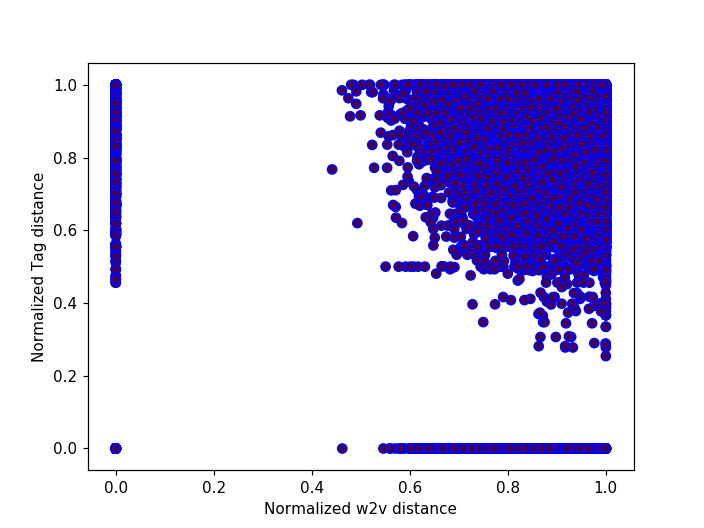

In [6]:
plt.scatter(class_zero.NormW2vDistance, class_zero.NormTagDistance, c = class_zero.label, edgecolors='blue')
plt.show()
plt.xlabel('Normalized w2v distance', fontsize=10)
plt.ylabel('Normalized Tag distance', fontsize=10) 

##### Plot for First Class ####

In [8]:
class_one = egplot_df[egplot_df['label']==1] 
class_one.head(10)

,DataSetno,Parano,Qnno,Sentno,NormW2vDistance,NormTagDistance,NormTagNerDistance,label
5,0,0,0,5,0.729640,0.910616,0.784717,1
10,0,0,1,3,0.771934,0.785890,0.840653,1
17,0,0,2,3,0.645446,0.894377,0.894662,1
24,0,0,3,3,0.824119,0.785890,0.840653,1
31,0,0,4,3,0.686815,0.785890,0.840653,1
2,0,1,0,2,0.805287,0.873641,0.813335,1
20,0,1,1,9,0.805598,0.986175,0.883034,1
22,0,1,2,0,0.704452,0.998022,0.869759,1
33,0,1,3,0,0.559121,0.888198,0.805972,1
51,0,1,4,7,0.651888,0.861357,0.932661,1


In [30]:
print(len(class_one))
print(len(class_zero))

12723
47406


In [9]:
%matplotlib nbagg 

<IPython.core.display.Javascript object>


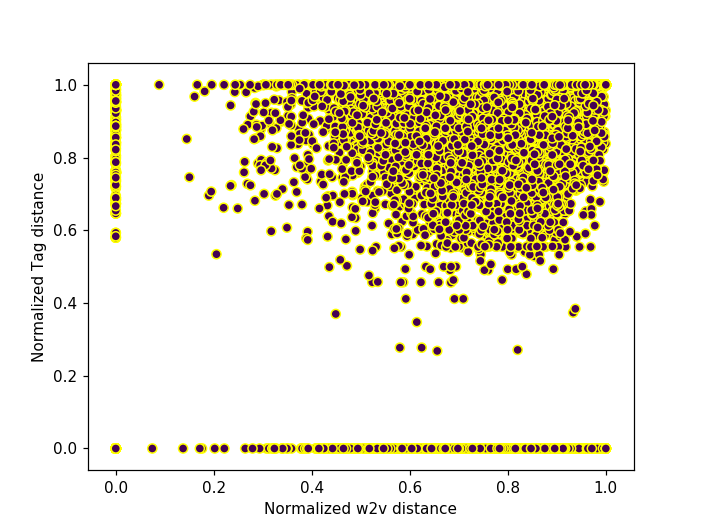

In [10]:
plt.scatter(class_one.NormW2vDistance, class_one.NormTagDistance, c = class_one.label,edgecolors='yellow')
plt.show()
plt.xlabel('Normalized w2v distance', fontsize=10)
plt.ylabel('Normalized Tag distance', fontsize=10) 

##### SVM #### 

In [11]:
from sklearn.model_selection import train_test_split


In [22]:
def show_confusion_matrix(C,class_labels=['0','1']):
    """
    C: ndarray, shape (2,2) as given by scikit-learn confusion_matrix function
    class_labels: list of strings, default simply labels 0 and 1.

    Draws confusion matrix with associated metrics.
    """
    import matplotlib.pyplot as plt
    import numpy as np
    
    assert C.shape == (2,2), "Confusion matrix should be from binary classification only."
    
    # true negative, false positive, etc...
    tn = C[0,0]; fp = C[0,1]; fn = C[1,0]; tp = C[1,1];

    NP = fn+tp # Num positive examples
    NN = tn+fp # Num negative examples
    N  = NP+NN

    fig = plt.figure(figsize=(8,8))
    ax  = fig.add_subplot(111)
    ax.imshow(C, interpolation='nearest', cmap=plt.cm.gray)

    # Draw the grid boxes
    ax.set_xlim(-0.5,2.5)
    ax.set_ylim(2.5,-0.5)
    ax.plot([-0.5,2.5],[0.5,0.5], '-k', lw=2)
    ax.plot([-0.5,2.5],[1.5,1.5], '-k', lw=2)
    ax.plot([0.5,0.5],[-0.5,2.5], '-k', lw=2)
    ax.plot([1.5,1.5],[-0.5,2.5], '-k', lw=2)

    # Set xlabels
    ax.set_xlabel('Predicted Label', fontsize=16)
    ax.set_xticks([0,1,2])
    ax.set_xticklabels(class_labels + [''])
    ax.xaxis.set_label_position('top')
    ax.xaxis.tick_top()
    # These coordinate might require some tinkering. Ditto for y, below.
    ax.xaxis.set_label_coords(0.34,1.06)

    # Set ylabels
    ax.set_ylabel('True Label', fontsize=16, rotation=90)
    ax.set_yticklabels(class_labels + [''],rotation=90)
    ax.set_yticks([0,1,2])
    ax.yaxis.set_label_coords(-0.09,0.65)


    # Fill in initial metrics: tp, tn, etc...
    ax.text(0,0,
            'True Neg: %d\n(Num Neg: %d)'%(tn,NN),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(0,1,
            'False Neg: %d'%fn,
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(1,0,
            'False Pos: %d'%fp,
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))


    ax.text(1,1,
            'True Pos: %d\n(Num Pos: %d)'%(tp,NP),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    # Fill in secondary metrics: accuracy, true pos rate, etc...
    ax.text(2,0,
            'False Pos Rate: %.2f'%(fp / (fp+tn+0.)),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(2,1,
            'True Pos Rate: %.2f'%(tp / (tp+fn+0.)),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(2,2,
            'Accuracy: %.2f'%((tp+tn+0.)/N),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(0,2,
            'Neg Pre Val: %.2f'%(1-fn/(fn+tn+0.)),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(1,2,
            'Pos Pred Val: %.2f'%(tp/(tp+fp+0.)),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))


    plt.tight_layout()
    plt.show()

In [14]:
features = list(egplot_df[['NormW2vDistance','NormTagDistance','NormTagNerDistance']]) 


##### Splitting the data set into train and test set ##### 

In [15]:
y = egplot_df["label"] 
X = egplot_df[features] 

# Split the data into a training set and a test set
X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state=0)  

In [16]:
print(len(X_train))
print(len(X_test)) 
print(len(Y_train))
print(len(Y_test))

45096
15033
45096
15033


In [33]:
X_train.head(5)

,NormW2vDistance,NormTagDistance,NormTagNerDistance
4,0.923741,0.000000,0.000000
39,0.986148,0.000000,1.000000
28,0.806925,0.926383,0.921974
18,1.000000,1.000000,1.000000
7,0.966534,0.669403,0.821892


In [37]:
Y_train.head(5) 

4     0
39    0
28    1
18    0
7     0
Name: label, dtype: int64

##### Summary statistic ######

In [36]:
print(X.describe())  

       NormW2vDistance  NormTagDistance  NormTagNerDistance
count     60129.000000     60129.000000        60129.000000
mean          0.845088         0.750735            0.816047
std           0.223216         0.341089            0.263171
min           0.000000         0.000000            0.000000
25%           0.815429         0.739300            0.785001
50%           0.907963         0.888229            0.896074
75%           0.982672         0.990014            0.995013
max           1.000000         1.000000            1.000000


In [17]:
from sklearn import svm 

svmclassifier = svm.SVC()
svm_model = svmclassifier.fit(X_train,Y_train)   
svmpredicted= svm_model.predict(X_test) 
svmpredicted 

array([1, 0, 0, ..., 0, 0, 0])

In [32]:
sum(Y_test)

3247

###### Classification report #####

In [19]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [28]:
print(classification_report(Y_test,svmpredicted, target_names=['class 0', 'class 1'])) 


             precision    recall  f1-score   support

    class 0       0.85      0.96      0.90     11786
    class 1       0.73      0.37      0.49      3247

avg / total       0.82      0.83      0.81     15033



##### Confusion matrix ####

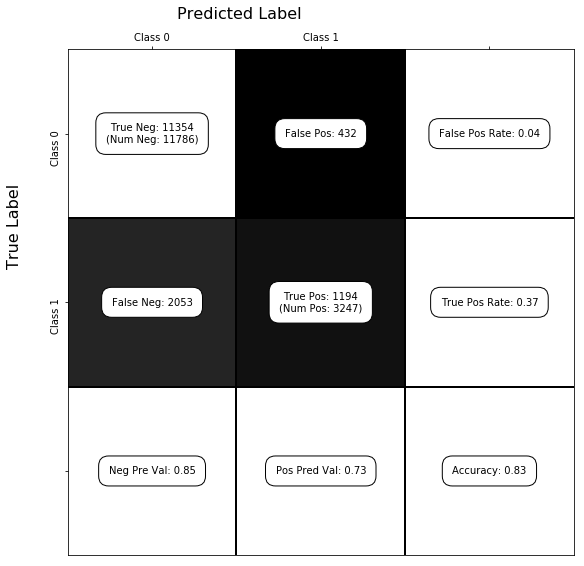

In [29]:
%matplotlib inline 
C = confusion_matrix(Y_test,svmpredicted)  
show_confusion_matrix(C, ['Class 0', 'Class 1'])       